In [114]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.optimize
from scipy.optimize import root
from scipy.optimize import fsolve

## SN Curve Prediction - Reverse Engineering

### Data Generation from an SN Curve

In [115]:
def S_e(a,b, S_uts, S_100):
    S_a  = 0.5*(b - a)*S_100
    S_m  = 0.5*(b + a)*S_100
    S_e  = S_a/(1-S_m/S_uts)
    
    return S_e

In [116]:
s_100 = 210
S_100 = s_100**2 # Stress Parameter

### Reverse Engineering the process to estimate S_uts (Ultimate Tensile Strength)

In [117]:
a_ar = np.array([0.40, 0.70, 0.33, 0.40, 0.333, 0.5833])**2
b_ar = np.array([1.00, 1.00, 0.83, 0.80, 0.666, 0.8333])**2

N  = [131300, 915400, 2403300, 8664200, 173210400,  37737400]

res_tab = pd.DataFrame(columns = ["UTS","40-100","70-100","33-83","40-80","33-66","58-83"])
Se_tab = pd.DataFrame(columns = ["UTS","40-100","70-100","33-83","40-80","33-66","58-83"])

### Reverse Engineering the process to estimate m (slope of sn curve)

In [118]:
for i in range(80850,80860,2):
    S_uts_est = i

    Se_arr = np.array([])

    for j in range(6):
        Se_temp = S_e(a_ar[j], b_ar[j], S_uts_est, S_100)
        Se_arr = np.append(Se_arr, Se_temp)
    
    X_train = np.log(Se_arr.reshape(-1,1))
    Y_train = np.log(N)

    regressor = LinearRegression()  
    regressor.fit(X_train, Y_train) #training the algorithm
    k = np.e**regressor.intercept_
    m = -regressor.coef_
    print(i,m,k)
    #logS_line = range(9,12,1)
    #logN_line = slop*logS_line + interc

    #plt.scatter( np.log(N), np.log(Se_arr) )
    #plt.plot(logN_line,logS_line)

    N_pred = k/(Se_arr**m)
    error = 100*( np.divide(N_pred,N) - 1)
    #print(np.append(S_uts_est,Se_arr))
    Se_tab = Se_tab.append( dict(zip(Se_tab.columns, np.append(S_uts_est,Se_arr))), ignore_index=True)
    res_tab = res_tab.append( dict(zip(res_tab.columns, np.append(S_uts_est,error))), ignore_index=True)

80850 [6.36231522] 1.74628479133039e+33
80852 [6.36235766] 1.7468925058672775e+33
80854 [6.3624001] 1.7475003819912492e+33
80856 [6.36244253] 1.748108419729103e+33
80858 [6.36248496] 1.748716619107414e+33


In [119]:
print(m,k)

[6.36248496] 1.748716619107414e+33


In [120]:
N_pred

array([1.09351192e+05, 1.06571880e+06, 2.72343021e+06, 9.03459614e+06,
       1.57067931e+08, 3.63228034e+07])

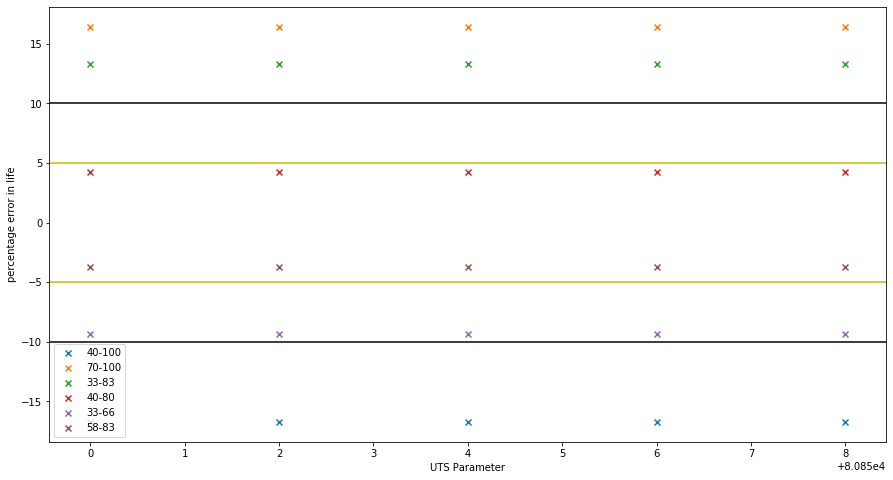

In [121]:
fig= plt.figure(figsize=(15,8))
columns = res_tab.columns
columns = np.delete(columns,0)
for i in range(6):
    c = columns[i]
    plt.scatter(res_tab['UTS'],res_tab[c], marker = 'x', label = c)
plt.legend()
plt.xlabel('UTS Parameter')
plt.ylabel('percentage error in life')
plt.axhline(y=10,color='k')
plt.axhline(y=-10,color='k')
plt.axhline(y=5,color='y')
plt.axhline(y=-5,color='y')

Text(0, 0.5, 'Se')

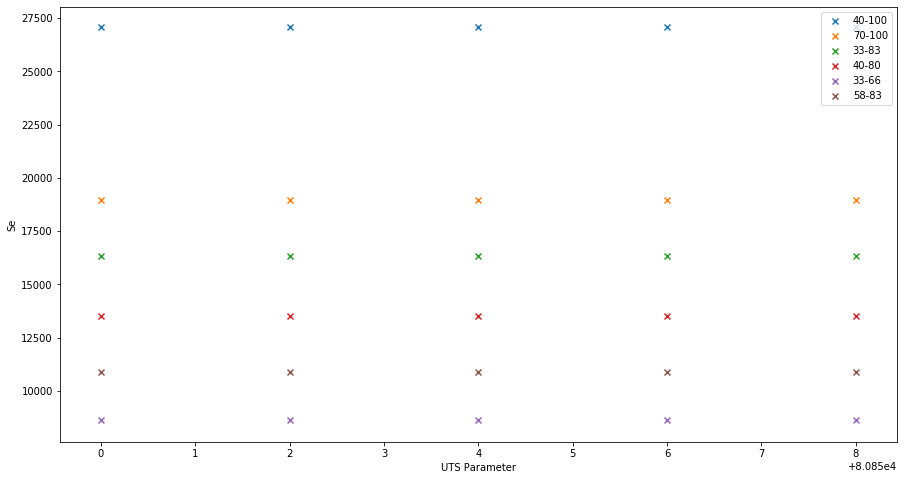

In [122]:
fig= plt.figure(figsize=(15,8))
columnse = Se_tab.columns
columnse = np.delete(columnse,0)
for i in range(6):
    c = columnse[i]
    plt.scatter(Se_tab['UTS'],(Se_tab[c]), marker = 'x', label = c)
plt.legend()
plt.xlabel('UTS Parameter')
plt.ylabel('Se')

In [123]:
Se_tab

,UTS,40-100,70-100,33-83,40-80,33-66,58-83
0,80850.0,27093.351064,18943.415008,16345.479051,13537.674419,8642.098742,10878.649113
1,80852.0,27093.040923,18943.094244,16345.366612,13537.580966,8642.060658,10878.543333
2,80854.0,27092.730805,18942.773508,16345.254180,13537.487519,8642.022576,10878.437561
3,80856.0,27092.420710,18942.452798,16345.141755,13537.394077,8641.984496,10878.331796
4,80858.0,27092.110637,18942.132115,16345.029337,13537.300642,8641.946419,10878.226039


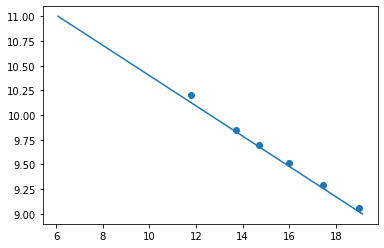

In [124]:
logS_line = range(9,12,1)
logN_line = slop*logS_line + interc

plt.scatter( np.log(N), np.log(Se_arr) )
plt.plot(logN_line,logS_line)

In [125]:
Se_ver = S_e(33.33,83.33,S_uts_est,S_100)
N_ver = 2403300

logN_pred = slop*np.log(Se_ver) + interc

error_ver = 100*(np.e**logN_pred/N_ver - 1)
print(error_ver)

[nan]


/home/shriram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [126]:
res_tab1 = pd.DataFrame(columns = ["UTS","40-100","70-100","33-83","40-80","33-66","58-83"])

a_ar = ([40, 70, 33, 40, 33.33, 58.33])
b_ar = ([100, 100, 83, 80, 66.66, 83.33])

N  = [131300, 915400, 2403300, 8664200, 173210400,  37737400]

for i in range(50000,52000,100):
    S_uts_est = i#49304.9319

    Se_arr = np.array([])

    for j in range(6):
        Se_temp = S_e(a_ar[j], b_ar[j], S_uts_est, S_100)
        Se_arr = np.append(Se_arr, Se_temp)

    X_train = np.log(Se_arr.reshape(-1,1))
    Y_train = np.log(N)

    regressor = LinearRegression()  
    regressor.fit(X_train, Y_train) #training the algorithm
    interc = regressor.intercept_
    slop = regressor.coef_

    Y_pred = regressor.predict(X_train)
    error = 100*(np.e**Y_pred/N - 1)

    res_tab1 = res_tab1.append( dict(zip(res_tab1.columns, np.append(S_uts_est,error))), ignore_index=True)

/home/shriram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
columns = res_tab1.columns
columns = np.delete(columns,0)
for i in range(6):
    c = columns[i]
    plt.scatter(res_tab1['UTS'],res_tab1[c], marker = 'x', label = c)
plt.legend()
plt.xlabel('UTS')
plt.ylabel('percentage error')
plt.axhline(y=10,color='k')
plt.axhline(y=-10,color='k')
plt.axhline(y=5,color='y')
plt.axhline(y=-5,color='y')